# Linear Regression 

This is an exercise from the Udemy course called [Complete Guide to TensorFlow for Deep Learning with Python](https://www.udemy.com/complete-guide-to-tensorflow-for-deep-learning-with-python/learn/v4/overview).

##### Necessary imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline #Magic method just for the notebook

##### Create the data

In [6]:
x_data = np.linspace(0.0, 10.0, 1000000)

##### Create some noise

In [7]:
noise = np.random.randn(len(x_data))

In [9]:
noise

array([ 0.53337433,  0.34745156,  0.54229464, ..., -0.17445874,
        0.60796663,  0.48720029])

##### The formula of the model

y = mx + b

b = 5

In [11]:
y_true = (0.5 * x_data) + 5 + noise

##### Create DataFrames
   Using Pandas DataFrames to make it easier to concatenate and to plot.

In [13]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [17]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [18]:
y_df.head()

,Y
0,5.533374
1,5.347457
2,5.542305
3,5.445351
4,4.805585


In [19]:
my_data = pd.concat([x_df,y_df],axis=1)

In [20]:
my_data.head()

,X Data,Y
0,0.00000,5.533374
1,0.00001,5.347457
2,0.00002,5.542305
3,0.00003,5.445351
4,0.00004,4.805585


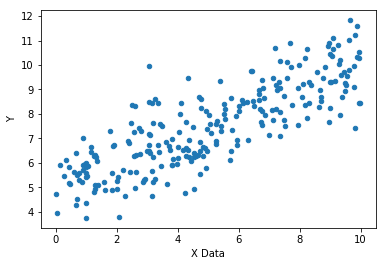

In [21]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

##### It will be processed in batches

In [22]:
batch_size = 8

##### Random starting values (it can be any)

In [23]:
np.random.randn(2)

array([ 2.1963109, -0.5399945])

##### Create variables

In [24]:
m = tf.Variable(2.19)
b = tf.Variable(0.53)

##### Create placeholders

In [25]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

##### Define graph operations

In [26]:
y_model = m*xph + b

##### Loss function (square errors)

In [27]:
error = tf.reduce_sum(tf.square(yph-y_model))

##### Gradient Descent Optimizer

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [29]:
train = optimizer.minimize(error)

##### Variable initializer

In [30]:
init = tf.global_variables_initializer()

In [31]:
with tf.Session() as sess:
    #Initialize variables
    sess.run(init)
    batches = 1000
    for i in range(batches):
        #Send 8 random index points
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        #Feed dictionary
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m, model_b = sess.run([m,b])

In [34]:
model_m

0.57559705

In [35]:
model_b

4.9274349

##### Visualize results

In [36]:
y_hat = model_m*x_data + model_b

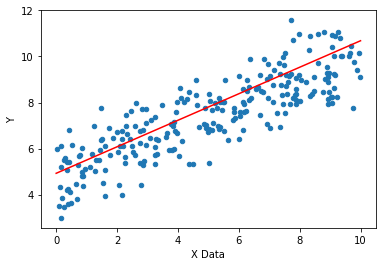

In [38]:
my_data.sample(250).plot(kind='scatter',x="X Data",y="Y")
plt.plot(x_data,y_hat,'r')